# Introduction

# Theory

The system of an electron bound to a nucleus can be described by the Schrödinger equation. For simplicity, let's assume that the nucleus is stationary, and the interaction between the nucleus and the electron is the Coulomb force. 

$$
\left( -\frac{\hbar^2}{2 m} \Delta - \frac{Ze^2}{4\pi \epsilon_0} \frac{1}{r}\right) \Psi(r, \theta, \varphi) = E \Psi(r, \theta, \varphi) 
$$

Here, $m$ and $e$ are the mass and charge of the electron, $Ze$ is the charge of the nucleus and $r$ is the distance between the nucleus and the electron. This is a partial differential equation for $\Psi$, which is the complex probabiliy amplitude of the electron. Because the interaction is isotropic, we can choose to work in spherical coordinates. Expanding the Laplacian in the basis of $(r, \theta, \varphi)$ gives the equation

$$
-\frac{\hbar^2}{2m}\left[\frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial \Psi}{\partial r}\right) + \frac{1}{r^2 \sin \theta}\frac{\partial }{\partial \theta} \left( \sin \theta \frac{\partial \Psi}{\partial \theta}\right) + \frac{1}{r^2\sin^2 \theta}\frac{\partial^2 \Psi}{\partial \varphi^2} \right] - \frac{Ze^2}{4\pi \epsilon_0}\frac{1}{r} \Psi = E\Psi.
$$

The analytic solution can be found by separation of variables, the wave function has the form of a product
$$
\Psi_{nlm}(r, \theta, \varphi) = R_{nl}(r)\Omega_{lm}(\theta, \varphi),
$$
with the $n, l, m$ numbers providing quantisation. The quantum numbers can take the following values
* $n = 1, 2, 3, ...$
* $l = 0, 1, 2, ..., n-1$
* $m = -l, ..., l$

Taking the proper normalisation into account, the wave function is
$$
\Psi_{nlm}(r, \theta, \varphi) = \sqrt{\left(\frac{2Z}{na_0}\right)^3\frac{(n-l-1)!}{2n(n+l)!}}e^{-\rho/2}\rho^l L^{2l+1}_{n-l-1}(\rho) Y^m_l(\theta, \varphi),
$$
where 
* $a_0= 4\pi \epsilon_0 \hbar^2/e^2$ is the Bohr-radius and $\rho = \frac{2rZ}{na_0}$
* $L^{2l+1}_{n-l-1}(\rho)$ is the Laguerre-polynomial of degree $n-l-1$
* $Y^m_l(\theta, \varphi)$ is the spherical harmonic of degree $l$ and order $m$.

The quantity $\Psi \Psi^* dV$ is the probability of finding the electron in a volume of size $dV$ around a point $(r, \theta, \varphi).$

# Visualisation

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.special as ss
import numpy as np
import math, pdb, sympy
from mpl_toolkits.mplot3d import Axes3D

from sympy.physics.hydrogen import R_nl
from sympy import var
from sympy import symbols
from sympy import integrate
from sympy import lambdify

In [3]:
class Mol_orbit(object):
    # Constants
    h_bar = 1.0545718*(10**-34)
    m_e = 9.10938356 *(10**-31)
    c = 300000000
    alpha = 1/137
    a_0 = h_bar/(m_e*c*alpha)
    a_0 = 1
    # Probability density
    rho = 0
    psi = 0
    
    def __init__(self, name, params, Z):
        self.name = name
        self.params = params # [n,l,m]
        self.Z = Z
        
    def Radial(self,p,q):
        r = symbols('r')
        PsiR = R_nl(p, q, r, self.Z)
        R = lambdify(r, PsiR, modules=['numpy'])
        return R

    def SphericalHarmonic(l,m,theta,phi,epsilon):
        return epsilon*np.sqrt((2.*l+1)*math.factorial(l-np.abs(m))/(4*np.pi*math.factorial(l+np.abs(m))))*np.real(np.exp(1.j*m*phi)*ss.lpmv(m,l,np.cos(theta)))
        
    def wavefunction(self, params, r, phi, theta):
        
        return psi
        
    
    
    def calc_rho(self, r, phi, theta):
        
        rho_cdf = np.abs(self.wavefunction(r, phi, theta))**2
        
        return rho_cdf
        
    def plot1d(self):
        fig, ax = plt.subplots()
        n = self.params[0]
        l = self.params[1]
        r = np.arange(0.0, 3., 0.0001)
        ax.plot(r, (self.Radial(n,l)(r)**2)*r**2/(4*np.pi), 'o')   
        ax.set_xlabel('R')
        ax.set_ylabel('$|\Psi|^2$')
        ax.set_title("Radial probabilities, n= $%s$, l = $%s$" %(n,l))
        plt.show()
        
    def plot2d(self):
        resolution = 300; frame_apothem = 0.5
        # create array of data points
        x = np.linspace(-frame_apothem*1.6,frame_apothem*1.6,int(resolution*1.6))
        y = np.linspace(-frame_apothem,frame_apothem,resolution)
        X, Y = np.meshgrid(x,y)
        # create an array of wavefunction values (1e-10 added so that arctan never sees X/0)
        radius = np.sqrt((X**2+Y**2))
                         
        Z = self.calc_rho(radius, 0, np.arctan(X/(Y+1e-10)))
        Z = Z.astype(np.float)
        Z = np.sqrt(Z)
        #plt.imshow(Z); plt.show()
        fig, ax = plt.subplots()
        im = ax.pcolormesh(X, Y, Z, cmap = cm.viridis)
        cbar_ax = fig.add_axes([1.1, 0.15, 0.05, 0.7])
        fig.colorbar(im, cax=cbar_ax)
        plt.show()
        
    def plot3d(self,length, width, height, nl, nw, nh, l0, w0, h0):
        '''
    Generate density matrix // n,l,m set

    INPUT
        length: Positive extent in x of box
        width: Positive extent in y of box
        height: Positive extent in z of box
        nl: Number of elements along length
        nw: Number of elements along width
        nh: Number of elements along height
        l0: Negative extent in x of box
        w0: Negative extent in y of box
        h0: Negative extent in z of box
        inFunc: Function to generate density data

    OUTPUT
        3D Density matrix
    '''
        n = self.params[0]
        l = self.params[1]
        m = self.params[2]
        # Initialize matrix
        outMat = np.zeros((nl,nw,nh))

        # Calculate function at each grid point
        for lIndex in range(nl):

            # X-coordinate
            xVal = l0 + 1.0*lIndex*(length-l0)/(nl-1)

            for wIndex in range(nw):

                # Y-coordinate
                yVal = w0 + 1.0*wIndex*(width-w0)/(nw-1)

                for hIndex in range(nh):

                    # Z-coordinate
                    zVal = h0 + 1.0*hIndex*(height-h0)/(nh-1)

                    # Translate to spherical coordinates
                    r = np.sqrt(xVal**2 + yVal**2 + zVal**2)

                    if (r == 0):
                        theta = 0
                    else:
                        theta = np.arccos(zVal/r)    

                    if (xVal == 0):
                        phi = np.pi/2
                    else:
                        phi = np.arctan(yVal/xVal)

                    funcEval = self.calc_rho(r, theta, phi)

                    outMat[lIndex,wIndex,hIndex] = np.real(funcEval*np.conj(funcEval))

            '''
        Write xsf 3D density file

        INPUT
            inMat: 3D input matrix
            length: Length of box
            width: Width of box
            height: Height of box
            l0: Zero coordinate for length
            w0: Zero coordinate for width
            h0: Zero coordinate for height

        OUTPUT
            Void. Creates xsf file

        * Note that I define the zero coordinate at the negative extent of the box - This is an arbitrary choice.
        '''
        inMat = outMat
        # Get matrix shape
        nl = inMat.shape[0]
        nw = inMat.shape[1]
        nh = inMat.shape[2]

        # Open the file for writing
        with open('testDensity_H.xsf','w') as outFile:
            # Write header
            outFile.write('BEGIN_BLOCK_DATAGRID_3D\n')
            outFile.write('\tHydrogen Density\n')
            outFile.write('\tBEGIN_DATAGRID_3D\n')

            # Write cell information
            outFile.write('\t\t' + str(nl) + ' ' + str(nw) + ' ' + str(nh) + '\n')
            outFile.write('\t\t' + str(l0) + ' ' + str(w0) + ' ' + str(h0) + '\n')
            outFile.write('\t\t' + str(length-l0) + ' ' + str(0.0) + ' ' + str(0.0) + '\n')
            outFile.write('\t\t' + str(0.0) + ' ' + str(width-w0) + ' ' + str(0.0) + '\n')
            outFile.write('\t\t' + str(0.0) + ' ' + str(0.0) + ' ' + str(height-h0) + '\n')

            outStr = ''

            # Write datagrid
            for hIndex in range(nh):
                for wIndex in range(nw):
                    for lIndex in range(nl):
                        outStr += str(inMat[lIndex,wIndex,hIndex]) + ' '

                    outFile.write('\t\t\t' + outStr + '\n')
                    outStr = ''

            # Write footer
            outFile.write('\tEND_DATAGRID_3D\n')
            outFile.write('END_BLOCK_DATAGRID_3D\n') 
    

In [9]:
class Hydrogen_ion(Mol_orbit):
    
    def radial(self, r):
        n = self.params[0]
        l = self.params[1]
        m = self.params[2]
        a_0 = self.a_0
        Z = self.Z
        rho = (2*r*Z)/(n*a_0)
        lag = self.Laguerre(2*l+1,n+l)
        return ((2/(n*Z*a_0))**3*(math.factorial((n-l-1))/(math.factorial(2*n*(n+l)))))**1/2*np.exp(-0.5*rho)*(rho**l)*lag(rho)
    def wavefunction(self, r, phi, theta):
        n = self.params[0]
        l = self.params[1]
        m = self.params[2]
        a_0 = self.a_0
        Z = self.Z
        
        # constant for the spherical harmonics (epsilon)
        if m>=0:
            epsilon = (-1)**m
        else:
            epsilon = 1
         
        sph = epsilon*np.sqrt((2.*l+1)*math.factorial(l-np.abs(m))/(4*np.pi*math.factorial(l+np.abs(m))))*np.real(np.exp(1.j*m*phi)*ss.lpmv(m,l,np.cos(theta)))        
        wavefunction = self.Radial(n, l)(r)*r**2* sph
        self.psi = wavefunction
        return self.psi
    
class Fe_ion(Hydrogen_ion):
    
    def MultipleWavefunction(self, rVec, phiVec, thetaVec):
        Psi = 1.
        for i in range(self.Z):
            Psi = Psi * self.wavefunction(rVec[i], phiVec[i], thetaVec[i])
        return Psi

In [10]:
h1 = Hydrogen_ion("Hidrogen", [3,2,2], 26)

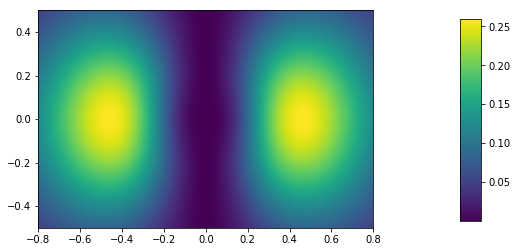

In [11]:
h1.plot2d()

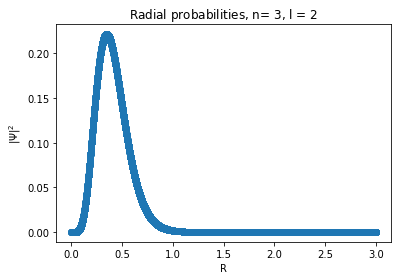

In [7]:
h1.plot1d()

In [12]:
h1.plot3d(10, 10, 10, 10, 10, 10, 0, 0, 0)

In [ ]:
h2 = Hydrogen_ion("Iron", [3, 2, 0], 26)
h2.plot2d()